In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set() # set default style 

In [2]:
gspc = pd.read_parquet('data/GSPC.parquet').reset_index()

In [3]:
gspc['Ticker'] = '^GSPC'

In [4]:
gspc

,Datetime,Open,High,Low,Close,Volume,Ticker
0,2020-01-28 09:30:00-05:00,3255.350098,3273.250000,3253.219971,3271.639893,0,^GSPC
1,2020-01-28 10:30:00-05:00,3271.199951,3278.439941,3270.459961,3277.850098,249209231,^GSPC
2,2020-01-28 11:30:00-05:00,3277.860107,3282.570068,3275.719971,3281.610107,182910058,^GSPC
3,2020-01-28 12:30:00-05:00,3281.590088,3281.959961,3274.919922,3276.320068,152018955,^GSPC
4,2020-01-28 13:30:00-05:00,3276.330078,3283.070068,3274.189941,3281.179932,161868381,^GSPC
...,...,...,...,...,...,...,...
3521,2022-01-26 11:30:00-05:00,4420.390137,4429.919922,4412.259766,4428.470215,253637547,^GSPC
3522,2022-01-26 12:30:00-05:00,4428.560059,4435.370117,4415.750000,4422.330078,254748000,^GSPC
3523,2022-01-26 13:30:00-05:00,4422.299805,4453.229980,4403.939941,4429.819824,351181000,^GSPC
3524,2022-01-26 14:30:00-05:00,4429.569824,4433.529785,4304.799805,4344.000000,598200000,^GSPC


In [5]:
def plot_close(df, x, y, hue=None, title='Ticker', x_label=None, y_label=None, save_name=None):
    ax = sns.lineplot(data=df, x=x, y=y, hue=hue)
    ax.set_title(title)
    plt.xticks(rotation=45)
    
    if x_label:
        ax.set_xlabel(x_label)
        
    if y_label:
        ax.set_ylabel(y_label)
    
    if save_name:
        if not os.path.exists('plots'):
            os.mkdir('plots')
        plt.savefig(f"plots/{save_name}.svg", bbox_inches = "tight")
    plt.show()

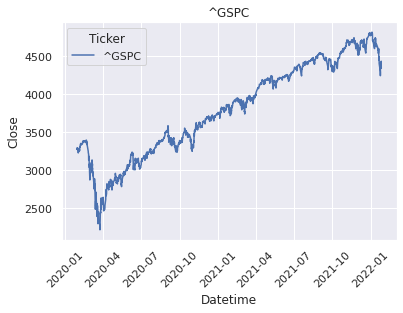

In [6]:
plot_close(df=gspc, x='Datetime', y='Close', hue='Ticker', title='^GSPC', save_name='GSPC_2020_2021')

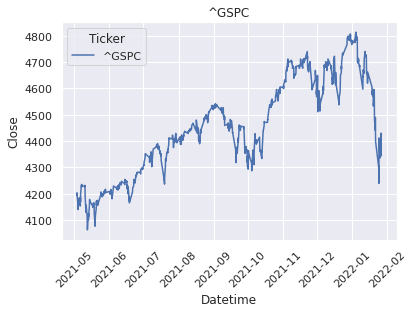

In [7]:
plot_close(df=gspc[gspc.Datetime > '2021-05-01'], x='Datetime', hue='Ticker', y='Close', title='^GSPC', save_name='GSPC_2021')

In [8]:
data = pd.read_parquet('data/clean/60m/data_clean_60m_close.parquet')

In [9]:
data = data[data.index < '2022-01-25']

In [10]:
data

,SBUX,ISRG,KIM,QCOM,GL,WFC,CRM,STT,WMT,AON,...,UAA,EFX,HII,APD,O,DPZ,ETN,CNC,TFC,GE
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-29 10:30:00-05:00,86.550003,574.609985,20.230000,88.120003,105.959999,47.674999,182.610001,77.400002,117.070000,217.705002,...,21.440001,155.050003,269.410004,236.934998,78.525002,284.299988,97.260002,65.739998,54.870300,103.639999
2020-01-29 11:30:00-05:00,86.050003,575.455017,20.230000,88.139999,105.989998,47.654999,183.220001,77.072502,116.860001,217.639999,...,21.230000,155.039993,263.200012,236.765106,78.635002,285.570007,97.070000,65.544998,54.799999,103.360001
2020-01-29 12:30:00-05:00,86.269997,576.500000,20.230000,88.425003,106.180000,47.709999,183.369995,76.855003,116.940002,217.679993,...,21.160000,155.190002,264.339996,237.384995,78.536499,285.625488,97.059998,65.570000,54.654999,103.239998
2020-01-29 13:30:00-05:00,87.065002,576.543030,20.160000,88.330002,106.180000,47.689999,183.660004,76.989998,116.713402,217.839996,...,21.160000,155.570007,264.839996,237.110001,78.389999,286.109985,97.135002,65.800003,54.195000,103.480003
2020-01-29 14:30:00-05:00,87.228996,574.309998,20.120001,88.324997,105.930000,47.415001,182.800003,76.430000,116.496803,217.330002,...,21.084999,154.839996,264.709991,237.339996,78.320000,286.179993,97.125000,65.459999,53.930000,103.199997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24 11:30:00-05:00,96.309998,269.279999,23.680000,164.860001,100.989998,53.660000,218.600006,90.930000,140.119995,266.359985,...,18.770000,225.570007,191.059998,282.429993,67.910004,434.799988,160.490005,77.129997,61.459999,96.290001
2022-01-24 12:30:00-05:00,96.309998,269.279999,23.680000,164.860001,100.989998,53.660000,218.600006,90.930000,140.119995,266.359985,...,18.770000,225.570007,191.059998,282.429993,67.910004,434.799988,160.490005,77.129997,61.459999,96.290001
2022-01-24 13:30:00-05:00,96.309998,269.279999,23.680000,164.860001,100.989998,53.660000,218.600006,90.930000,140.119995,266.359985,...,18.770000,225.570007,191.059998,282.429993,67.910004,434.799988,160.490005,77.129997,61.459999,96.290001


In [11]:
stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'GOOG', 'FB', 'NVDA']

In [22]:
df = data[stocks]

In [23]:
df = df[df.index > '2021-07-01']

In [24]:
df = df[stocks] / df[stocks].iloc[0]

In [25]:
df = df.melt(var_name='Ticker', value_name='Close', ignore_index=False).reset_index()

In [26]:
df.rename(columns={'Close': 'Normalized Close'}, inplace=True)
df

,Datetime,Ticker,Normalized Close
0,2021-07-01 09:30:00-04:00,AAPL,1.000000
1,2021-07-01 10:30:00-04:00,AAPL,0.996001
2,2021-07-01 11:30:00-04:00,AAPL,0.998820
3,2021-07-01 12:30:00-04:00,AAPL,0.997869
4,2021-07-01 13:30:00-04:00,AAPL,1.001383
...,...,...,...
7979,2022-01-24 11:30:00-05:00,NVDA,1.156557
7980,2022-01-24 12:30:00-05:00,NVDA,1.156557
7981,2022-01-24 13:30:00-05:00,NVDA,1.156557
7982,2022-01-24 14:30:00-05:00,NVDA,1.156557


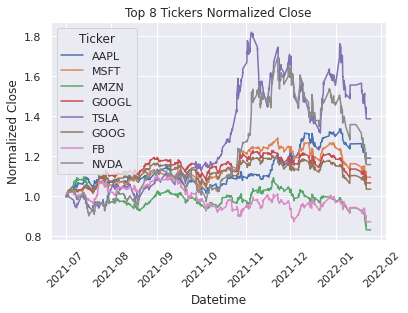

In [28]:
plot_close(df=df, x='Datetime', y='Normalized Close', hue='Ticker', title='Top 8 Tickers Normalized Close', save_name='top8_norm')